## PYTHON JOURNEY MACHINE & DEEP LEARNING
### Trabalho prático usando Python
 
### Árvore de Regressão

Dataset Bike Sharing

Descrição: Os sistemas de compartilhamento de bicicletas são uma nova geração de aluguel de bicicletas tradicional, onde todo o processo de associação, locação e devolução tornou-se automático. Através destes sistemas, o usuário pode facilmente alugar uma bicicleta a partir de uma determinada posição e retornar em outra posição. Atualmente, existem cerca de 500 programas de compartilhamento de bicicletas em todo o mundo, compostos por mais de 500 mil bicicletas. Hoje, existe um grande interesse nesses sistemas devido ao seu importante papel no trânsito, questões ambientais e de saúde.

Fonte de dados: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

Dicionário de variáveis:
- instant:
- dteday:
- season: (1:winter, 2=springer, 3:summer, 4:fall)
- yr: year (0: 2011, 1:2012)
- mnth: ( 1 to 12)
- holiday (0=no;1=yes)
- weekday (day of the week)
- workingday (0=no;1=yes) 
- weathersit (1: Clear, Few clouds , Partly cloudy, Partly cloudy; 2: Mist + Cloudy, Mist + Broken clouds, 
              Mist + Few clouds, Mist;3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + 
              Scattered clouds;4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog) 
- temp (Normalized temperature in Celsius). The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, 
        t_max=+39 (only in hourly scale)
- atemp (Normalized feeling temperature in Celsius). The values are derived via (t-t_min)/(t_max-t_min),
   t_min=-16, t_max=+50 (only in hourly scale)
- hum (Normalized humidity_. The values are divided to 100 (max)
- windspeed	Normalized wind speed. The values are divided to 67 (max)
- casual (count of casual users)
- registered (count of registered users) 
- cnt (count of total rental bikes including both casual and registered)

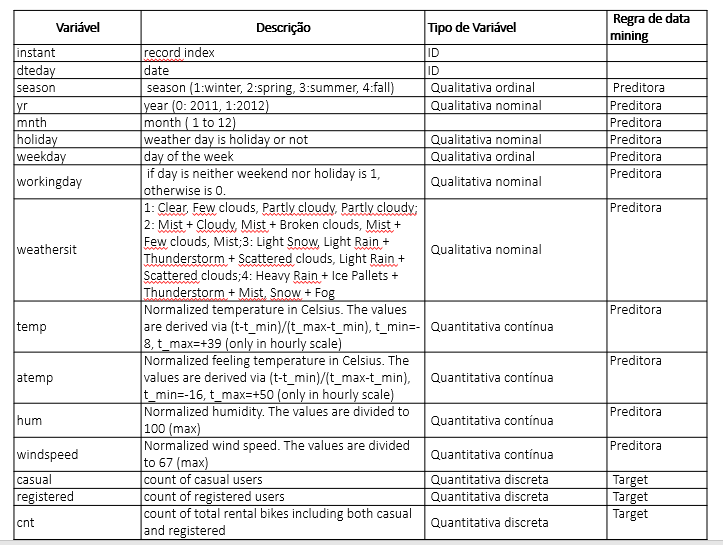

In [2]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Importar os dados
df=pd.read_csv(r'C:\Users\lucas\Downloads\trab5_solucao\Bike_Sharing.csv')

In [7]:
# Pre-processing
# Mudar o formato da variável quantitativa em qualitativa
df['season']= df['season'].astype(str)
df['yr']= df['yr'].astype(str)
df['holiday']= df['holiday'].astype(str)
df['weekday']= df['weekday'].astype(str)
df['workingday']= df['workingday'].astype(str)
df['weathersit']= df['weathersit'].astype(str)


In [8]:
# modificando os nomes das colunas
df.columns = ['ID', 'data', 'estacao', 'ano', 'mes', 'feriado', 'dia_semana','dia_util', 'clima_dia', 'temperatura',
 'sensacao_termica', 'umidade', 'vel_vento', 'casual_user', 'registrado_user', 'cnt_total']

In [9]:
# Selecionar as variáveis preditoras para Árvore de Regressão
list_preditoras = [
 'estacao',
 'ano',
 'mes',
 'feriado',
 'dia_semana',
 'dia_util',
 'clima_dia',
 'temperatura',
 'sensacao_termica',
 'umidade',
 'vel_vento']

In [10]:
# Dividir a amostra em treino e validação
from sklearn.model_selection import train_test_split

# 30% para validação
df_train, df_test = train_test_split(df,
                                     test_size = 0.3,
                                     random_state=75)

In [11]:
# Amostra treino
y_train = df_train['cnt_total']
x_train = df_train[list_preditoras]

In [12]:
# Amostra validação
y_test = df_test["cnt_total"]
x_test = df_test[list_preditoras]

In [19]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 544 to 727
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   estacao           220 non-null    object 
 1   ano               220 non-null    object 
 2   mes               220 non-null    int64  
 3   feriado           220 non-null    object 
 4   dia_semana        220 non-null    object 
 5   dia_util          220 non-null    object 
 6   clima_dia         220 non-null    object 
 7   temperatura       220 non-null    float64
 8   sensacao_termica  220 non-null    float64
 9   umidade           220 non-null    float64
 10  vel_vento         220 non-null    float64
dtypes: float64(4), int64(1), object(6)
memory usage: 20.6+ KB


In [13]:
# Importar a biblioteca da Árvore de Regressão
from sklearn.tree import DecisionTreeRegressor, plot_tree


In [22]:
# Árvore de Regressão
clf = DecisionTreeRegressor(random_state=0, max_depth = 10, min_samples_leaf=100)
clf.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=100, random_state=0)

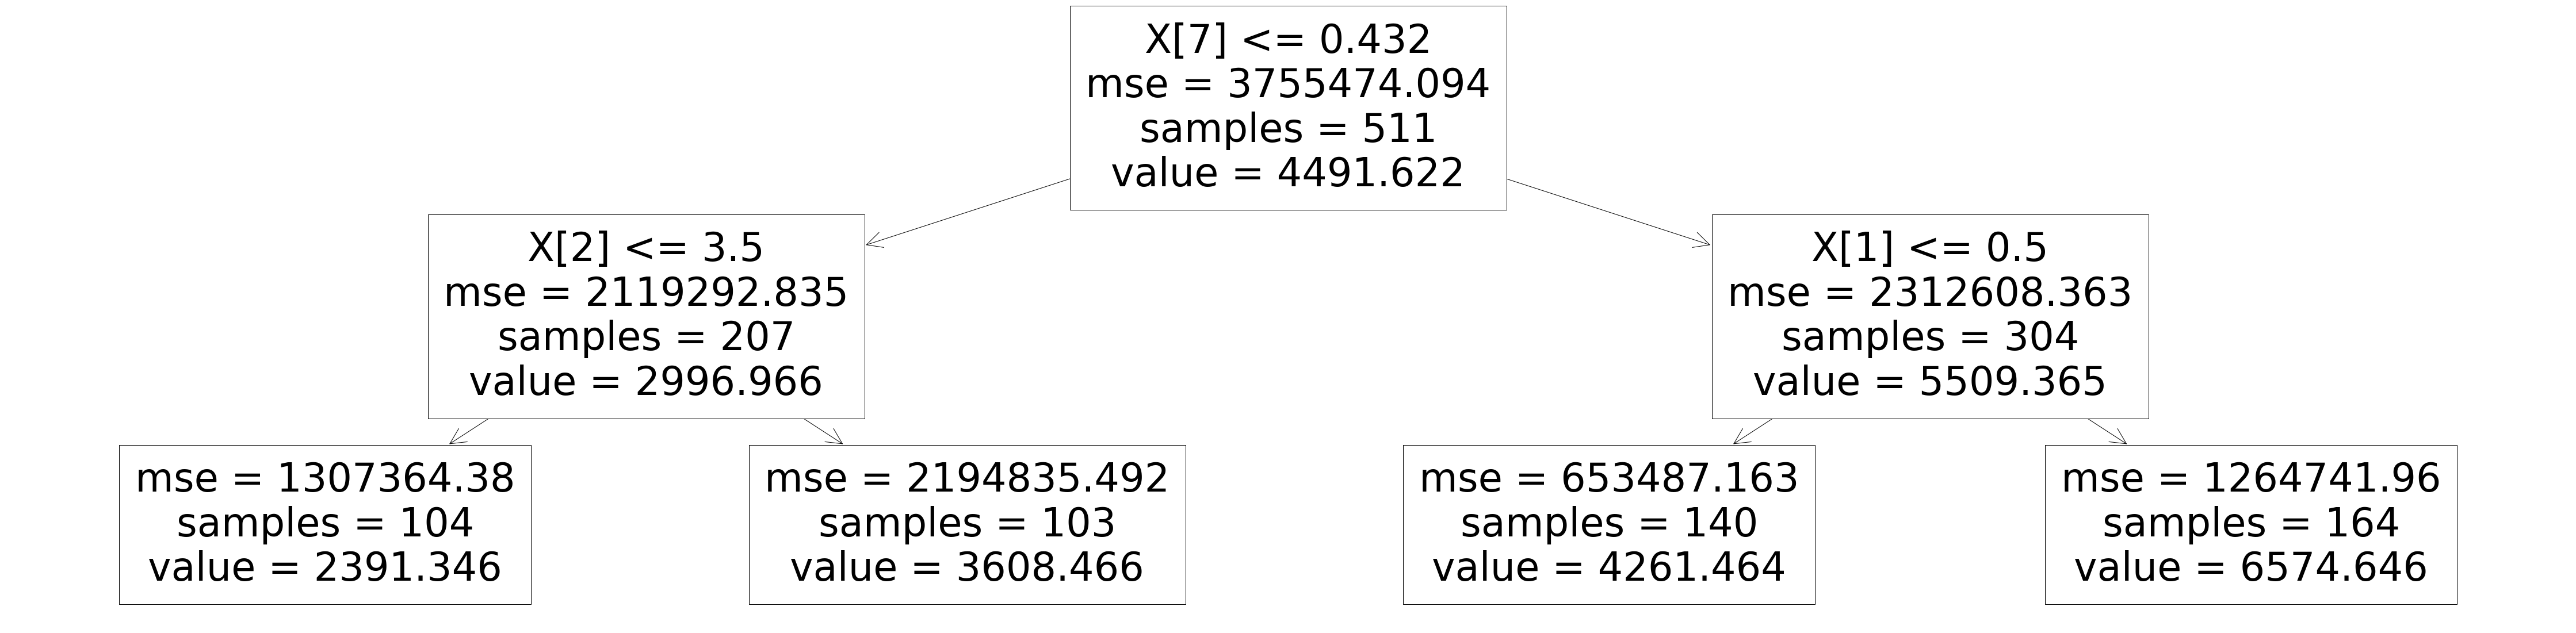

In [23]:
# Gráfico da Árvore de Regressão
plt.figure(figsize = (80,20))
plot_tree(clf) 
plt.show()

In [24]:
# Predição da variável targe
y_train_pred = clf.predict(x_train)
y_test_pred  = clf.predict(x_test)

In [28]:
print(type(y_train_pred))

<class 'numpy.ndarray'>


### Medidas de erros

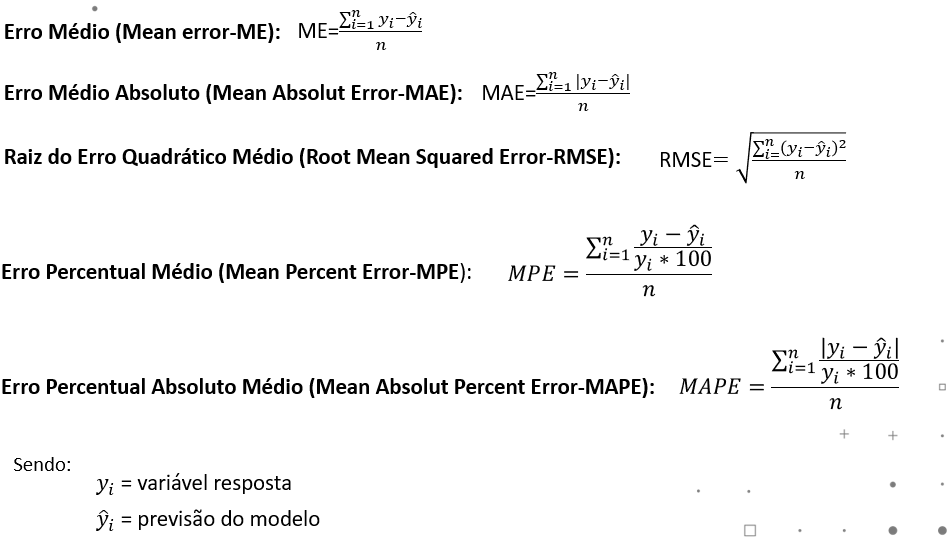

In [29]:
# Importar a biblioteca com as medidas de erros
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [30]:
# Medidas de erros: Erro médio (me), Erro percentual médio (mpe), Erro médio absoluto (mae), 
# Erro percentual absoluto médio (MAPE) e Erro quadrático médio (mse)  
# Na amostra treino

me1   = round((y_train-y_train_pred).mean(),2)
mae1  = (mean_absolute_error(y_train, y_train_pred)).round(2)
mse1  = (mean_squared_error(y_train, y_train_pred)).round(2)
rmse1  = (np.sqrt(mean_squared_error(y_train, y_train_pred))).round(2)
mpe1  = round(((y_train - y_train_pred)/y_train).mean(),2)
mape1  =  round((mae1/y_train).mean(),2) 


In [31]:
# Medidas de erros: Erro médio (me), Erro percentual médio (mpe), Erro médio absoluto (mae), 
# Erro percentual absoluto médio (MAPE) e Erro quadrático médio (mse)  
# Na amostra de validação
me2   = round((y_test-y_test_pred).mean(),2)
mae2  = (mean_absolute_error(y_test, y_test_pred)).round(2)
mse2  = (mean_squared_error(y_test, y_test_pred)).round(2)
rmse2  = (np.sqrt(mean_squared_error(y_test, y_test_pred))).round(2)
mpe2  = round(((y_test - y_test_pred)/y_test).mean(),2)
mape2  =  round((mae2/y_test).mean(),2) 


In [32]:
# Concatenar os resultados
list1 = [me1, mae1,mse1,rmse1,mpe1, mape1]
list2 = [me2, mae2,mse2,rmse2,mpe2, mape2]
pd.DataFrame({"treino":list1, "teste": list2})

,treino,teste
0,0.00,156.35
1,884.86,935.93
2,1293424.34,1440762.36
3,1137.29,1200.32
4,-0.74,-0.12
5,0.35,0.28
